# Multi-model

Data file: https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Framingham_heart_disease_4000.csv

## Process
* Load data
* Examine data
  * Display (e.g. bar chart) class distribution of target variable (TenYearCHD)
* Prepare data for model training
  * Perform the following data preparation steps:
    * Handle missing values
    * Variable encoding
    * Feature scaling
    * Principal component analysis (PCA)
      * NOTE: Binary variables are not ideal for Principal Component Analysis (PCA), particularly because PCA is designed for continuous, normally distributed data  
* Display a sample of 20 rows of the final set of independent variables used for all the model trainings
* Train Logistic Regression, KNN, Random Forest, and SVC models
* Display (e.g. bar chart) model accuracy for all 4 models


In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 05/25/25 02:28:07


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Load data

In [3]:
# Read data from file (Framingham_heart_disease_4000.csv) into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Framingham_heart_disease_4000.csv')

### Examine data

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Review dataframe shape
df.shape

(4000, 16)

In [6]:
# Display a sample of 5 rows from dataframe
df.sample(5)

,gender,age,attended_college,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
154,Female,52,NaN,No,0.0,no,NO,no,N,268.0,109.0,70.0,23.74,75.0,78.0,N
2285,Male,45,y,Yes,20.0,no,NO,no,N,257.0,117.5,82.5,24.62,58.0,86.0,N
893,Female,50,y,No,0.0,no,NO,yes,N,305.0,151.0,106.5,25.38,100.0,75.0,N
3517,Male,46,n,No,0.0,no,NO,no,N,205.0,118.0,76.5,23.48,75.0,77.0,N
3232,Female,63,n,No,0.0,no,NO,no,N,207.0,127.0,75.0,22.26,70.0,77.0,N


### Display bar chart showing class distribution for target variable (TenYearCHD)

In [7]:
# Display class distribution counts
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
N,3402
Y,598


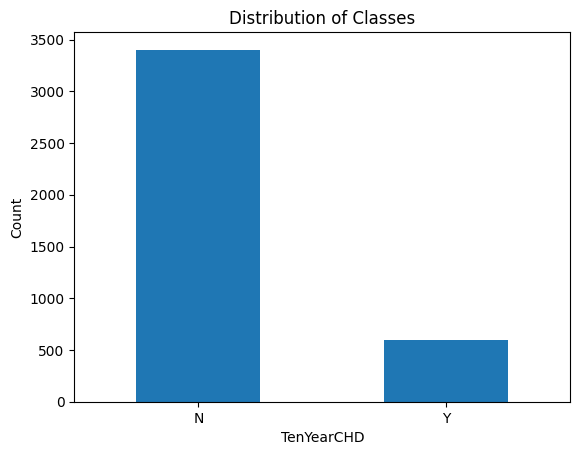

In [8]:
# Display bar chart showing class distribution
df['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks(rotation=0)
plt.show()

### Prepare data for model training

#### Check for missing values

In [9]:
df.isna().sum()

,0
gender,0
age,0
attended_college,100
currentSmoker,0
cigsPerDay,27
BPMeds,48
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,49


#### Use the SimpleImputer to replace missing values

In [10]:
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

cols_to_impute_1 = ['attended_college']
df[cols_to_impute_1] = imp_most_freq.fit_transform(df[cols_to_impute_1])

cols_to_impute_2 = ['BPMeds']
df[cols_to_impute_2] = imp_most_freq.fit_transform(df[cols_to_impute_2])

In [11]:
df.groupby('TenYearCHD')['cigsPerDay'].mean()

,cigsPerDay
TenYearCHD,
N,8.782055
Y,10.305369


In [12]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df.groupby('TenYearCHD')['cigsPerDay'].transform('mean'))

In [13]:
df.groupby('TenYearCHD')['totChol'].mean()

,totChol
TenYearCHD,
N,234.917311
Y,245.234295


In [14]:
df['totChol'] = df['totChol'].fillna(df.groupby('TenYearCHD')['totChol'].transform('mean'))

In [15]:
df.groupby('TenYearCHD')['BMI'].mean()

,BMI
TenYearCHD,
N,25.661520
Y,26.586854


In [16]:
df['BMI'] = df['BMI'].fillna(df.groupby('TenYearCHD')['BMI'].transform('mean'))

In [17]:
df.groupby('TenYearCHD')['glucose'].mean()

,glucose
TenYearCHD,
N,80.638015
Y,89.858696


In [18]:
df['glucose'] = df['glucose'].fillna(df.groupby('TenYearCHD')['glucose'].transform('mean'))

#### Check for missing values again

In [19]:
df.isna().sum()

,0
gender,0
age,0
attended_college,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


### Perform variable encoding

In [20]:
oe_currentSmoker = OrdinalEncoder(categories=[['Yes','No']])
df['currentSmoker'] = oe_currentSmoker.fit_transform(df[['currentSmoker']])

In [21]:
oe_BPMeds = OrdinalEncoder(categories=[['yes','no']])
df['BPMeds'] = oe_BPMeds.fit_transform(df[['BPMeds']])

In [22]:
oe_prevalentStroke = OrdinalEncoder(categories=[['YES','NO']])
df['prevalentStroke'] = oe_prevalentStroke.fit_transform(df[['prevalentStroke']])

In [23]:
oe_prevalentHyp = OrdinalEncoder(categories=[['yes','no']])
df['prevalentHyp'] = oe_prevalentHyp.fit_transform(df[['prevalentHyp']])

In [24]:
oe_diabetes = OrdinalEncoder(categories=[['Y','N']])
df['diabetes'] = oe_diabetes.fit_transform(df[['diabetes']])

In [25]:
df = pd.get_dummies(df, columns=['gender', 'attended_college'], dtype=int)

In [26]:
le = LabelEncoder()
df['TenYearCHD'] = le.fit_transform(df['TenYearCHD'])

In [27]:
df.sample(5)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender_Female,gender_Male,attended_college_n,attended_college_y
305,48,0.0,20.0,1.0,1.0,1.0,1.0,210.0,134.5,84.0,27.97,65.0,87.000000,0,0,1,1,0
1269,63,1.0,0.0,1.0,1.0,0.0,1.0,219.0,145.5,80.0,26.60,72.0,89.858696,1,0,1,1,0
2772,55,1.0,0.0,1.0,1.0,1.0,1.0,232.0,119.0,81.0,30.00,60.0,100.000000,1,1,0,1,0
3572,59,1.0,0.0,1.0,1.0,0.0,1.0,282.0,148.0,89.0,25.69,90.0,80.638015,0,1,0,0,1
2118,66,1.0,0.0,0.0,1.0,0.0,1.0,290.0,152.5,90.0,23.63,80.0,76.000000,0,1,0,1,0


### Separate independent and dependent variables
* Independent variables: All variables EXCEPT TenYearCHD
* Dependent variable: TenYearCHD

In [28]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

#### Standardize the independent variables

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Perform principal component analysis (PCA)

In [30]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender_Female,gender_Male,attended_college_n,attended_college_y
0,-0.881002,-1.016130,0.504718,-5.686241,0.079305,-1.492786,0.163383,-0.326191,0.486621,0.766307,0.386821,0.180700,0.300675,-1.157230,1.157230,0.612793,-0.612793
1,-0.764096,-1.016130,2.611147,0.175863,0.079305,-1.492786,0.163383,-0.371308,1.484423,1.855778,1.290139,-0.069173,1.377052,-1.157230,1.157230,0.612793,-0.612793
2,1.106396,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.012188,-0.034957,0.095863,-0.398992,1.180194,0.515950,-1.157230,1.157230,0.612793,-0.612793
3,0.755679,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.553596,0.577331,-0.490775,0.213012,-0.235756,0.559005,0.864132,-0.864132,0.612793,-0.612793
4,-0.881002,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,-1.205978,-0.964727,-0.993608,-1.473671,-0.818794,-0.043766,0.864132,-0.864132,-1.631871,1.631871


In [31]:
X_scaled_NOpca = X_scaled_df.drop(['totChol','sysBP','diaBP','BMI','heartRate','glucose'], axis=1)
X_scaled_NOpca.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,gender_Female,gender_Male,attended_college_n,attended_college_y
0,-0.881002,-1.016130,0.504718,-5.686241,0.079305,-1.492786,0.163383,-1.157230,1.157230,0.612793,-0.612793
1,-0.764096,-1.016130,2.611147,0.175863,0.079305,-1.492786,0.163383,-1.157230,1.157230,0.612793,-0.612793
2,1.106396,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,-1.157230,1.157230,0.612793,-0.612793
3,0.755679,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,0.612793,-0.612793
4,-0.881002,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,-1.631871,1.631871


In [32]:
X_scaled_continuous_variables = X_scaled_df.drop(['age','cigsPerDay','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes',
                                        'gender_Female','gender_Male','attended_college_n','attended_college_y'], axis=1)
X_scaled_continuous_variables.head()

,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-0.326191,0.486621,0.766307,0.386821,0.180700,0.300675
1,-0.371308,1.484423,1.855778,1.290139,-0.069173,1.377052
2,0.012188,-0.034957,0.095863,-0.398992,1.180194,0.515950
3,0.553596,0.577331,-0.490775,0.213012,-0.235756,0.559005
4,-1.205978,-0.964727,-0.993608,-1.473671,-0.818794,-0.043766


In [33]:
pca = decomposition.PCA(n_components=1, random_state=42)
X_pca = pca.fit_transform(X_scaled_continuous_variables)

X_pca_df = pd.DataFrame(X_pca, columns=['PC1'])
X_pca_df.head()

,PC1
0,0.905564
1,2.599183
2,0.233044
3,0.302689
4,-2.240015


In [34]:
df_new = pd.concat([X_scaled_NOpca, X_pca_df], axis=1)

### Display a sample of 20 rows from the final set of independent variables used for all the model trainings

In [35]:
df_new.sample(20)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,gender_Female,gender_Male,attended_college_n,attended_college_y,PC1
2366,0.989490,0.984126,-0.759139,0.175863,0.079305,-1.492786,0.163383,-1.157230,1.157230,0.612793,-0.612793,1.344316
1745,0.755679,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,-1.157230,1.157230,0.612793,-0.612793,-0.987590
1775,1.574019,-1.016130,2.863919,0.175863,0.079305,0.669888,0.163383,-1.157230,1.157230,-1.631871,1.631871,-1.983037
2865,0.288056,0.984126,-0.759139,0.175863,0.079305,-1.492786,0.163383,0.864132,-0.864132,0.612793,-0.612793,0.366758
3191,1.106396,0.984126,-0.759139,0.175863,0.079305,-1.492786,0.163383,0.864132,-0.864132,0.612793,-0.612793,1.856166
842,0.989490,-1.016130,-0.506368,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,0.612793,-0.612793,-1.244803
3494,0.054244,-1.016130,0.504718,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,-1.631871,1.631871,-1.044449
2340,-1.465530,0.984126,-0.759139,0.175863,0.079305,-1.492786,0.163383,-1.157230,1.157230,0.612793,-0.612793,1.822075
118,0.054244,-1.016130,0.083432,0.175863,0.079305,-1.492786,0.163383,0.864132,-0.864132,0.612793,-0.612793,1.284722
3435,-0.179567,-1.016130,1.347290,0.175863,0.079305,0.669888,-6.120583,0.864132,-0.864132,0.612793,-0.612793,-0.593144


### Display a sample of 5 rows from the final set of dependent variables used for all the model trainings

In [36]:
y.sample(5)

,TenYearCHD
3978,0
3972,0
1469,0
3542,0
1251,0


### Split data into training and test sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.30, random_state=42, stratify=y)

### Train Logistic Regression model


In [38]:
LogReg = LogisticRegression(class_weight='balanced', max_iter=300, C=0.1)
LogReg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=300)

### Evaluate Logistic Regression model

In [39]:
# Calculate and display model accuracy
LogReg_accuracy = LogReg.score(X_test, y_test)
print("Logistic Regression Accuracy =", round((LogReg_accuracy * 100), 2),"%")

Logistic Regression Accuracy = 67.5 %


In [40]:
LogReg_predictions = LogReg.predict(X_test)
print(classification_report(y_test, LogReg_predictions))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1021
           1       0.27      0.68      0.38       179

    accuracy                           0.68      1200
   macro avg       0.60      0.68      0.58      1200
weighted avg       0.83      0.68      0.72      1200



### Train KNN classifier model

In [41]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

### Evaluate KNN model

In [42]:
# Calculate and display model accuracy
knn_accuracy = knn.score(X_test, y_test)
print("KNN Accuracy =", round((knn_accuracy * 100), 2),"%")

KNN Accuracy = 85.08 %


### Train Random Forest classifier model

In [43]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=500)

### Evaluate Random Forest model

In [44]:
# Calculate and display model accuracy
rf_accuracy = rf.score(X_test, y_test)
print("Random Forest Accuracy =", round((rf_accuracy * 100), 2),"%")

Random Forest Accuracy = 82.33 %


### Train Support Vector classifier model

In [45]:
svc = NuSVC(class_weight='balanced', nu=0.1, kernel='poly', coef0=0.1)
svc.fit(X_train, y_train)

NuSVC(class_weight='balanced', coef0=0.1, kernel='poly', nu=0.1)

### Evaluate Support Vector Classifier model

In [46]:
# Calculate and display model accuracy
svc_accuracy = svc.score(X_test, y_test)
print("SVC Accuracy =", round((svc_accuracy * 100), 2),"%")

SVC Accuracy = 84.5 %


### Display bar chart comparison of accuracy for all 4 models

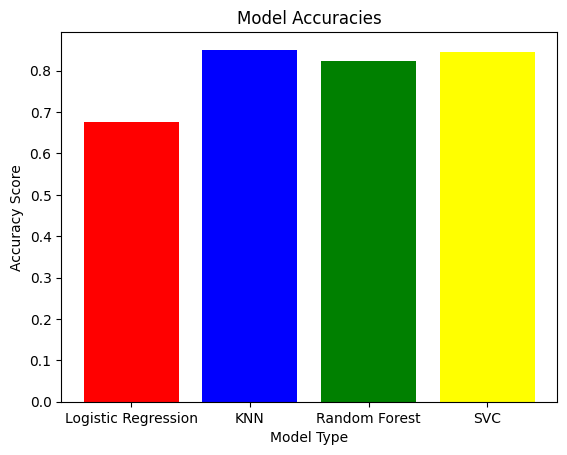

In [47]:
accuracy_scores = [LogReg_accuracy, knn_accuracy, rf_accuracy, svc_accuracy]
names = ['Logistic Regression', 'KNN', 'Random Forest', 'SVC']

colors = ['red','blue','green','yellow']
plt.bar(names, accuracy_scores, color=colors)
plt.ylabel('Accuracy Score')
plt.xlabel('Model Type')
plt.title('Model Accuracies')
plt.show()